In [1]:
print('olá!')
      

olá!


In [5]:
import sys
!{sys.executable} -m pip install plotly


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 7.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 9.1 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 8.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\Regina\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px
px.__version__

In [11]:
import plotly
import plotly.express as px

plotly.__version__


'6.5.2'

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px


#Cria dados aleatórios para trabalhar 
idades = np.random.randint(20,60,20)
salarios = idades *np.random.randint(80,120,20)
pontuacoes = salarios *np.random.uniform(0.5, 1.5,20)
profissoes = ['Engenheiro', 'Professor', 'Medico', 'Advogado', 'Designer', 'Analista', 'Gerente', 'Programador']

novo_data = {
    'Idade': idades,
    'Salário': salarios,
    'Pontuação': pontuacoes.round(2)
}

df = pd.DataFrame(novo_data)
estado_civil = ['Casado', 'Solteiro']
df['Estado_Civil'] = np.random.choice(estado_civil, size = len(df))
df['Profissão'] = np.random.choice(profissoes, size = len(df))


df.head(10)



,Idade,Salário,Pontuação,Estado_Civil,Profissão
0,33,2772,1613.36,Solteiro,Engenheiro
1,34,3264,4105.75,Solteiro,Advogado
2,25,2050,2832.58,Casado,Gerente
3,44,4400,4702.98,Solteiro,Professor
4,29,2726,3412.57,Casado,Advogado
5,27,2241,2508.25,Casado,Gerente
6,25,2125,1292.77,Solteiro,Gerente
7,50,5750,8219.74,Casado,Medico
8,22,2178,1773.62,Casado,Advogado
9,48,5568,3452.60,Casado,Engenheiro


A Matplotlib não é tã interativa, mas é mt usada para criar gráficos diferentes 
'Pontuação': pontuacoes.round(2) mostra o arredondamento para duas casas decimais 
Abaixo vai criar um gráfico de barras barplot que no caso mostra a distribuição dos salários no df 

In [ ]:
plt.figure(figsize=(10,6))
salario_por_profissao = df.groupby('Profissão')['Salário'].mean()
plt.bar(salario_por_profissao.index, salario_por_profissao, color ='skyblue')
plt.title('Distribuição de Salários', fontsize= 16) #Aqui add o titulo e determinou o tamanho da fonte
plt.xlabel('Índice', fontsize= 12) #Add titulo no eixo x com fonte 12
plt.ylabel('Salário', fontsize= 12) #Add titulo no eixo y com fonte 12
plt.xticks(rotation= 45) #Alterou no eixo x a inclinação
plt.grid(True, linestyle = '--', alpha= 0.7)
plt.show()


In [ ]:
#Gráfico de linhas/Lineplot

media_score_por_idade = df.groupby('Idade')['Pontuação'].mean() #Aqui agrupa a média da pontuação por idade
#agrupa a media da pontuação e dps separa por idade
media_score_por_idade = media_score_por_idade.sort_index() 
plt.figure(figsize = (10,6))
plt.plot(media_score_por_idade.index, media_score_por_idade, marker = 'o', color = 'red') #o marker é a bolinha
plt.title('Média do score por idade', fontsize = 16)
plt.xlabel('Idade', fontsize = 12)
plt.ylabel('Media do Score', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()


In [ ]:
#Gráfico duplo de linhas e colunas a primeira coisa a se fazer é o padrão de agrupamento
#cria uma variavel para receber a média de salario por idade 
media_salario_por_idade = df.groupby('Idade')['Salário'].mean()
media_score_por_idade = media_salario_por_idade.sort_index()
#aqui coloca a idade em ordem decrescente

fig, ax1 = plt.subplots(figsize= (10,6))
#Plotando a média de score por idade:
ax1.plot(media_salario_por_idade.index, media_salario_por_idade, marker ='o', color = 'red', label= 'Média do score')
ax1.set_xlabel('Idade', fontsize= 12)
ax1.set_ylabel('Média do Score', color = 'red', fontsize = 12)

ax2= ax1.twinx()
ax2.bar(media_score_por_idade.index, media_score_por_idade, color = 'blue', alpha = 0.5, label = 'Média Salário')
ax2.set_ylabel('Média de Salário', color = 'blue', fontsize = 12)
#Ele adiciona uma segunda coluna para a media de salario por idade essa etapa é a configuração do gráfico de barras 
#criando um segundo eixo y.

#Adicionando linha e legenda do primeiro eixo x:
lines1, labels1 = ax1.get_legend_handles_labels()

#Agr p segundo ax2
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right', bbox_to_anchor =(1.2,1.2))
#esse bbox determina a posição q c altera ali dentro-aqui usou 1.2

#O labels 1 + labels 2 concatena os rotulos das legendas dos dois eixos, o upper right especifica que a legenda será posicionada 
#no canto superior direito do gráfico.



In [ ]:
#Gráficos de Dispersão/ plt.scatter

plt.figure(figsize=(10,6))
plt.scatter(df['Idade'], df['Salário'], color = 'purple', alpha = 0.7)
plt.title('Relação entre salário e idade', fontsize = 16)
plt.xlabel('Idade', fontsize = 12)
plt.ylabel('Salario', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

In [ ]:
#Boxplot/pltboxplot

plt.figure(figsize = (8,6))
plt.boxplot(df['Salário'])
plt.title('Boxplot Salário', fontsize = 16)
plt.ylabel('Salário', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

#O gráfico mostra q n tem mts anomalias pequena dispersão acima da mediana e abaixo da mediana os primeiros 50%-a > parte dos dados


In [ ]:
#Boxplot duplo
plt.figure(figsize= (10,6))
plt.boxplot([df['Pontuação'], df['Salário']], labels = ['Pontuação', 'Salário'])
plt.title('Boxplot de pontuação e salário', fontsize = 16)
plt.ylabel('Valor', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

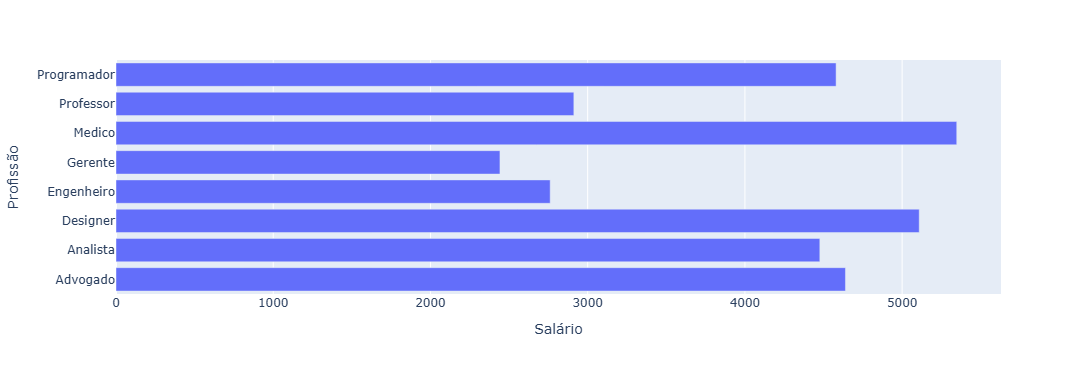

In [14]:
#Usando a biblioteca plotly.express- vc importa as px, é tão boa quanto a matplot, a diferença é q o gráfico fica interativo
#Gráfico de colunas com barra horizontal com média de salário por profissão

salario_por_profissao = df.groupby('Profissão')['Salário'].mean().reset_index()
fig = px.bar(salario_por_profissao, x = 'Salário', y = 'Profissão', orientation = 'h')
title = 'Salários por profissão'
labels = {'Salário': 'Salário Médio', 'Profissão': 'Profissão'}
fig.show()



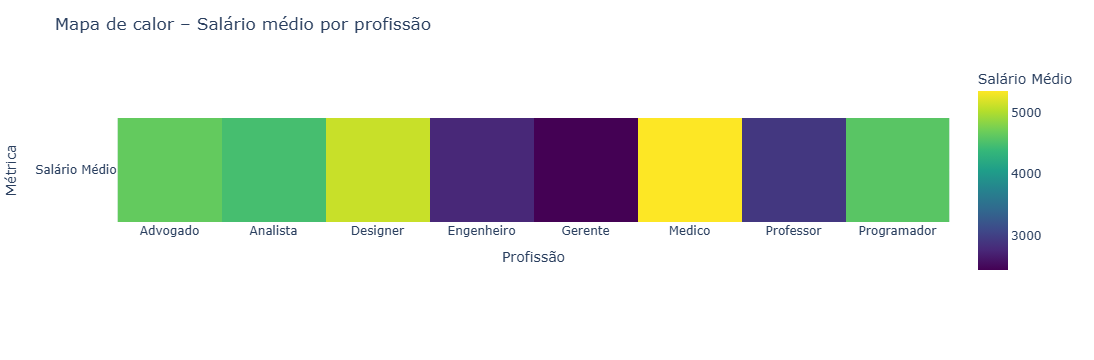

In [17]:
#Mapa de Calor aui add a cor e usa para criar a escala de salário
fig = px.imshow(
    salario_por_profissao[['Salário']].T,
    labels=dict(x="Profissão", y="Métrica", color="Salário Médio"),
    x=salario_por_profissao['Profissão'],
    y=['Salário Médio'],
    color_continuous_scale='Viridis'
)

fig.update_layout(title='Mapa de calor – Salário médio por profissão')
fig.show()


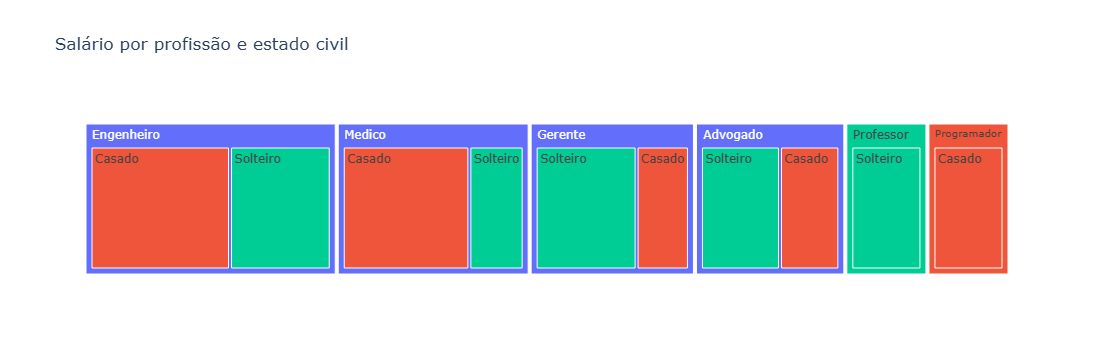

In [28]:
#Mapa de árvore para fazer isso agrupa os dados do dataframe por profissão e estado civil dps calcula a média de salário por profissão e estado civil
salario_por_profissao_estado_civil = df.groupby(['Profissão', 'Estado_Civil'])['Salário'].mean().reset_index()
fig = px.treemap(salario_por_profissao_estado_civil,
                 path =['Profissão', 'Estado_Civil'],
                 values = 'Salário',
                 title = 'Salário por profissão e estado civil',
                 color = 'Estado_Civil')
fig.show()

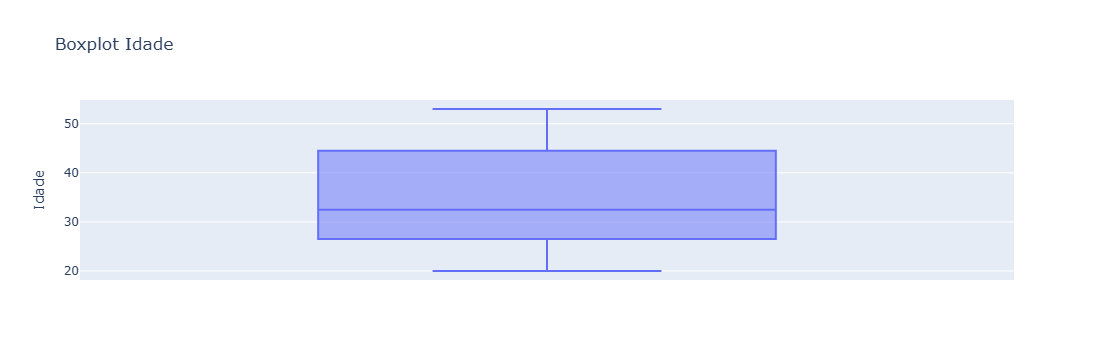

In [30]:
#Boxplot de idade
fig = px.box (df, y = 'Idade', title = 'Boxplot Idade')
fig.show()

Visualização dos daos é o processo de representar graficamente os dados para facilitar a compreensão e comunicação de informaçõs cmplexas
e inclui a criação dos graficos tabelas e elementos visuais.

Plotlyexpress é uma biblioteca de visuaização de dados em python que permite a criação de gráficos interativos de forma rápida.

Gráficos dee Pizza são gráficos circlares qe mostram partes proporcionais de um todo. Cada "fatia" representa uma categoria e seu tamanho é proporcional a conribuição dessa categoria para o total.

Gráfico de dispersão é aquele que mostra a relação entre duas variáves plotando pontos em um eixo cartesiano. É útil para idenificar correlações e padrões entre as variáveis.

Gráfico Combinado ´um gráfico que permite a visualização de duas séries de dados simultaneamente, geralmente combinado gráficos de barra e linha para mostrar relações complexas entre os dados.

Boxplot é  tipo de gráfico que exibe a distribuição de um conjnto de dados atraves dos seus quartis. Ele mostra a mediana os quartis superior, inferior e possíveis outliers o que facilita a comparação entre os grupos.

Dicas
Os graficos de coluna são para comparar categorias enquanto os gráficos de linha mostram tendencias ao longo do tempo 

Caso 1: Um relatório de vendas utiliza gráficos de coluna e linha para mostrar o desempenho de vendas ao longo do tempo e comparar diferentes categorias de produtos

Caso 2: Uma analise de marketing que cria ggráficos de dispersão para analisar diferentes variáveis das campanhas de marketing

